## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df_mat = pd.read_csv('data/student-por.csv', sep = ';')

#### Show Top 5 Records

In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### Preparing X and Y variables

In [4]:
X = df_mat.drop(columns=['G3'],axis=1)

In [5]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [6]:
for column in df_mat.columns:
    print(f"Categories in {column} variable:     ",end=" " )
    print(df_mat[column].unique())

Categories in school variable:      ['GP' 'MS']
Categories in sex variable:      ['F' 'M']
Categories in age variable:      [18 17 15 16 19 22 20 21]
Categories in address variable:      ['U' 'R']
Categories in famsize variable:      ['GT3' 'LE3']
Categories in Pstatus variable:      ['A' 'T']
Categories in Medu variable:      [4 1 3 2 0]
Categories in Fedu variable:      [4 1 2 3 0]
Categories in Mjob variable:      ['at_home' 'health' 'other' 'services' 'teacher']
Categories in Fjob variable:      ['teacher' 'other' 'services' 'health' 'at_home']
Categories in reason variable:      ['course' 'other' 'home' 'reputation']
Categories in guardian variable:      ['mother' 'father' 'other']
Categories in traveltime variable:      [2 1 3 4]
Categories in studytime variable:      [2 3 1 4]
Categories in failures variable:      [0 3 1 2]
Categories in schoolsup variable:      ['yes' 'no']
Categories in famsup variable:      ['no' 'yes']
Categories in paid variable:      ['no' 'yes']
Categorie

In [7]:
y = df_mat['G3']

In [8]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(649, 58)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((519, 58), (130, 58))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "SVC": SVC(),
    "Elastic Net": ElasticNet(),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

SVC
Model performance for Training set
- Root Mean Squared Error: 1.2714
- Mean Absolute Error: 0.5453
- R2 Score: 0.8464
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8314
- Mean Absolute Error: 1.2462
- R2 Score: 0.6561


Elastic Net
Model performance for Training set
- Root Mean Squared Error: 1.7124
- Mean Absolute Error: 1.0994
- R2 Score: 0.7214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4945
- Mean Absolute Error: 0.9688
- R2 Score: 0.7710


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.2253
- Mean Absolute Error: 0.8117
- R2 Score: 0.8574
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2388
- Mean Absolute Error: 0.7948
- R2 Score: 0.8426


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.6556
- Mean Absolute Error: 1.0728
- R2 Score: 0.7396
----------------------------------


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4739
- Mean Absolute Error: 0.3078
- R2 Score: 0.9787
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2817
- Mean Absolute Error: 0.7712
- R2 Score: 0.8315


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0062
- Mean Absolute Error: 0.0035
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3443
- Mean Absolute Error: 0.8274
- R2 Score: 0.8147


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1864
- Mean Absolute Error: 0.1373
- R2 Score: 0.9967
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2857
- Mean Absolute Error: 0.7749
- R2 Score: 0.8305


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1.0468
- Mean Absolute Error: 0.8237
- R2 Score: 0.89

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Ridge,0.848835
2,Linear Regression,0.842619
7,Random Forest Regressor,0.831546
10,AdaBoost Regressor,0.831174
9,CatBoosting Regressor,0.830494
8,XGBRegressor,0.814692
3,Lasso,0.789805
1,Elastic Net,0.770971
6,Decision Tree,0.713660
5,K-Neighbors Regressor,0.707539


## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

## Performance evaluation

In [17]:
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.26


In [18]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.24
R2: 0.84


## Plot y_pred and y_test

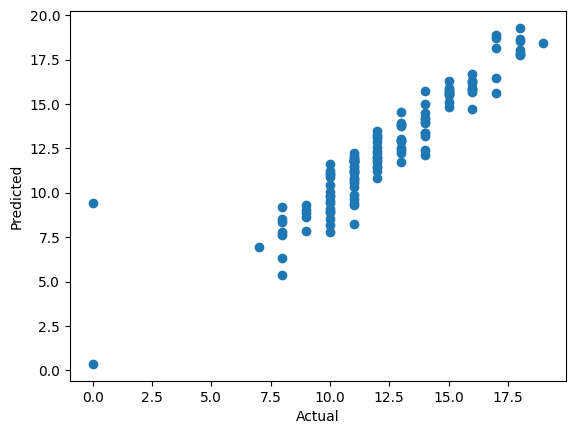

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

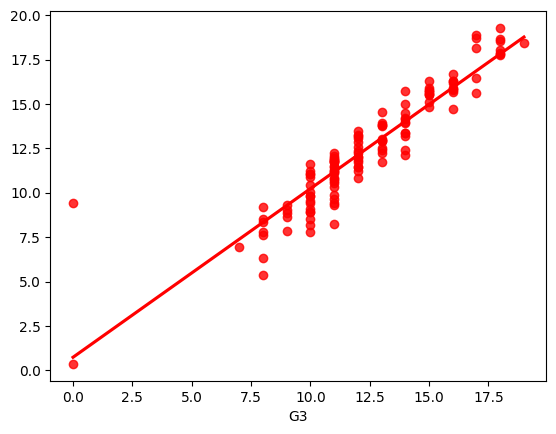

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
636,19,18.414062,0.585938
220,12,11.875000,0.125000
594,18,18.546875,-0.546875
429,11,10.750000,0.250000
72,11,11.718750,-0.718750
...,...,...,...
514,7,6.945312,0.054688
374,17,18.703125,-1.703125
444,11,9.296875,1.703125
244,12,13.265625,-1.265625


## Catboost Regressor

In [22]:
model = CatBoostRegressor(verbose=False)
train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)


bestTest = 1.938942043
bestIteration = 99

0:	loss: 1.9389420	best: 1.9389420 (0)	total: 45.7ms	remaining: 4.34s

bestTest = 1.411855682
bestIteration = 84

1:	loss: 1.4118557	best: 1.4118557 (1)	total: 68.2ms	remaining: 3.2s

bestTest = 1.951963719
bestIteration = 99

2:	loss: 1.9519637	best: 1.4118557 (1)	total: 104ms	remaining: 3.21s

bestTest = 1.405544144
bestIteration = 77

3:	loss: 1.4055441	best: 1.4055441 (3)	total: 122ms	remaining: 2.82s

bestTest = 1.957063237
bestIteration = 99

4:	loss: 1.9570632	best: 1.4055441 (3)	total: 140ms	remaining: 2.56s

bestTest = 1.405003868
bestIteration = 84

5:	loss: 1.4050039	best: 1.4050039 (5)	total: 158ms	remaining: 2.38s

bestTest = 2.038021648
bestIteration = 99

6:	loss: 2.0380216	best: 1.4050039 (5)	total: 179ms	remaining: 2.28s

bestTest = 1.405825319
bestIteration = 99

7:	loss: 1.4058253	best: 1.4050039 (5)	total: 197ms	remaining: 2.16s

bestTest = 1.558561072
bestIteration = 149

8:	loss: 1.5585611	best: 1.4050039 (5)	total: 224m

{'params': {'depth': 4,
  'iterations': 150,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

## Performance evaluation

In [23]:
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.46


In [24]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.19
R2: 0.85


## Plot y_pred and y_test

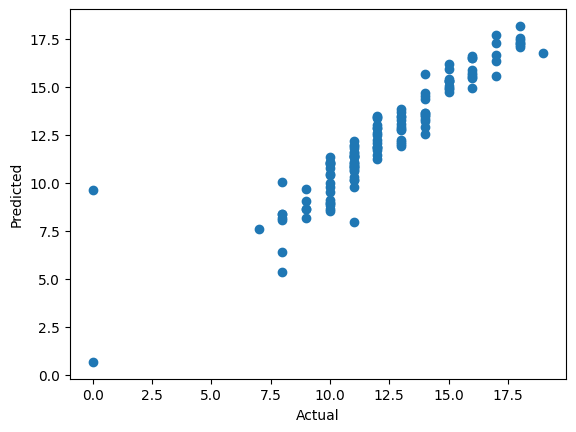

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

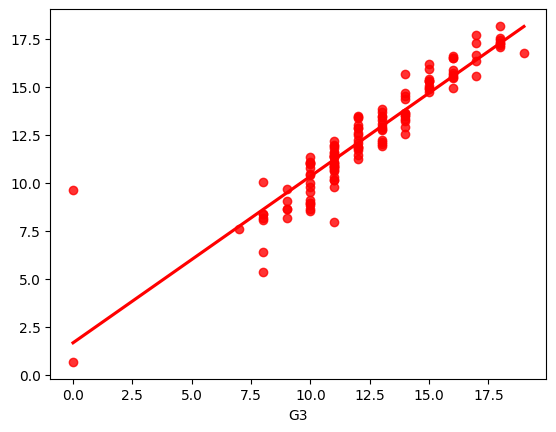

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
636,19,16.770051,2.229949
220,12,11.252005,0.747995
594,18,17.304978,0.695022
429,11,11.106567,-0.106567
72,11,11.376624,-0.376624
...,...,...,...
514,7,7.605592,-0.605592
374,17,17.314278,-0.314278
444,11,10.298931,0.701069
244,12,13.450476,-1.450476


## Variable importance plot

In [28]:
xval = [column for column in df_mat.columns if column not in ["G3"]]

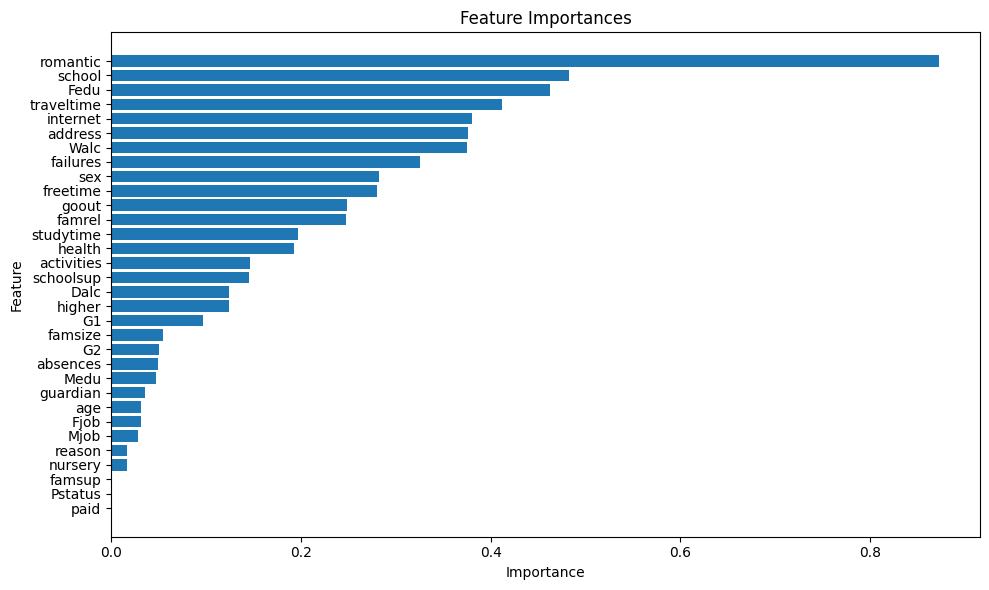

In [29]:
feature_importance = model.get_feature_importance()

# Create a dictionary of feature names and their importance scores
feature_importance_dict = dict(zip(xval, feature_importance))

feature_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()

plt.show()

In [30]:
feature_importance_dict

{'romantic': 0.8720669412140724,
 'school': 0.4822161687632081,
 'Fedu': 0.46252778201238826,
 'traveltime': 0.41148832052392964,
 'internet': 0.38081564020278946,
 'address': 0.3762779251718472,
 'Walc': 0.3749499559568978,
 'failures': 0.32581091141163726,
 'sex': 0.28176357232114857,
 'freetime': 0.2806723598849266,
 'goout': 0.24822160218704573,
 'famrel': 0.24719670569505095,
 'studytime': 0.19720986602218746,
 'health': 0.1928025774436612,
 'activities': 0.1463858066073948,
 'schoolsup': 0.14513006339804252,
 'Dalc': 0.1239751373911697,
 'higher': 0.12391100218525533,
 'G1': 0.09679692492343397,
 'famsize': 0.05416993010296892,
 'G2': 0.050429863879266616,
 'absences': 0.04986247841616674,
 'Medu': 0.04729635400367852,
 'guardian': 0.03557516637465966,
 'age': 0.03194004475988242,
 'Fjob': 0.03114205475650647,
 'Mjob': 0.028269642665562332,
 'reason': 0.01625221876788946,
 'nursery': 0.01619657209333786,
 'Pstatus': 0.0,
 'famsup': 0.0,
 'paid': 0.0}

In [31]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.19
R2: 0.85


## Plot y_pred and y_test

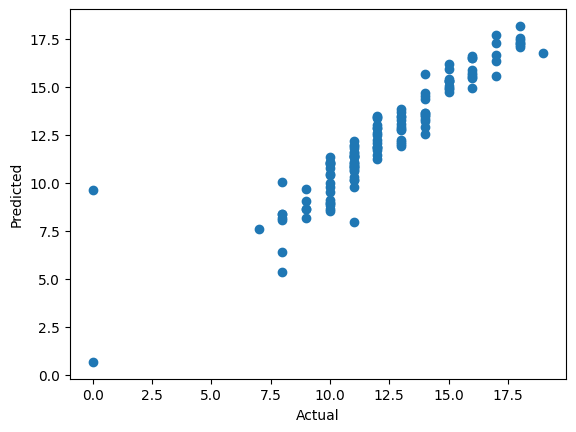

In [32]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

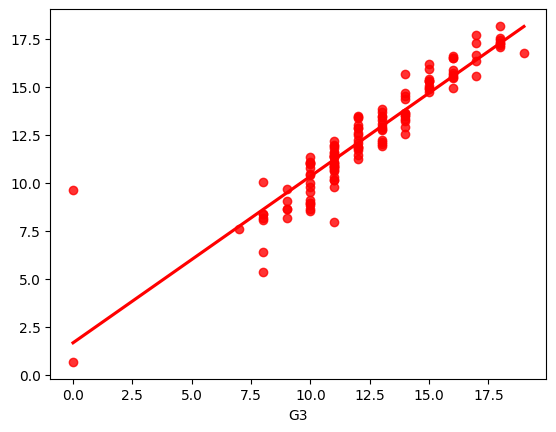

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
636,19,16.770051,2.229949
220,12,11.252005,0.747995
594,18,17.304978,0.695022
429,11,11.106567,-0.106567
72,11,11.376624,-0.376624
...,...,...,...
514,7,7.605592,-0.605592
374,17,17.314278,-0.314278
444,11,10.298931,0.701069
244,12,13.450476,-1.450476
